# IDs: 313429607,317225993

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)
irisdata = irisdata[0:100]
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']
class_set = set(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

c=0

## 5

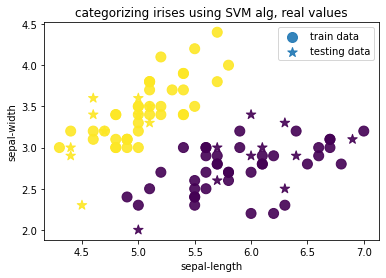

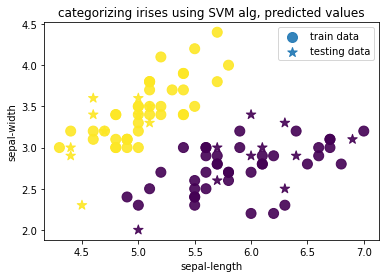

In [2]:

import matplotlib.pyplot as plt
def plotScatter(X_train, X_test, y_train, y_test,title):
    X_train = np.array(X_train)
    X_test = np.array(X_test)

    s_train = set(y_train)
    dic  = {}
    for index,element in enumerate(s_train):
        dic[element] = index
    colors_train = []
    for lab in y_train:
        colors_train.append(dic[lab])
    colors_train = np.array(colors_train)
    s1 = plt.scatter(np.array(X_train[:,0]),np.array(X_train[:,1]),c = colors_train , s=100, 
        alpha = 0.9,label = "train data", marker='o')
    colors_test = []
    for lab in y_test:
        colors_test.append(dic[lab])
    colors_test = np.array(colors_test)
    s2 = plt.scatter(np.array(X_test[:,0]),np.array(X_test[:,1]), s=100,c=colors_test ,alpha = 0.9,
        label="testing data",marker='*')
    plt.title(title)
    plt.legend(["data set","training"])
    plt.legend()
    plt.xlabel(colnames[0])
    plt.ylabel(colnames[1])
    plt.show()

plotScatter(X_train, X_test, y_train, y_test,"categorizing irises using SVM alg, real values")
plotScatter(X_train, X_test, y_train, y_pred,"categorizing irises using SVM alg, predicted values")


## 6+7

In [3]:

def results(y_test,y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    TP = 0;TN = 0;FP = 0;FN = 0
    s_train = set(y_train)
    dic  = {}
    for index,element in enumerate(s_train):
        dic[element] = index
    if len(y_test) != len(y_pred):
        return np.zeros((2,2))
    for y in np.stack((y_test,y_pred)).transpose():
        if(y[0] == y[1]):
            if dic[y[0]] == 1:
                TP += 1
            else:
                TN += 1
        else:
            if dic[y[0]] == 0:
                FN += 1
            else:
                FP += 1
    res = np.array([[TP,FN],[FP,TN]])
    return TP,TN,FP,FN


TP,TN,FP,FN = results(y_test,y_pred)
print(np.array([[TP,FN],[FP,TN]]))
TPR = TP/(TP+FN)
FPR = 1 - (TN/(TN+FP))
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
res = """TPR = {0}
FPR = {1}
accuracy = {2}
precision = {3}"""
print(res.format(TPR,FPR,accuracy,precision))


[[10  0]
 [ 0 10]]
TPR = 1.0
FPR = 0.0
accuracy = 1.0
precision = 1.0


## 8+9+10+11+12

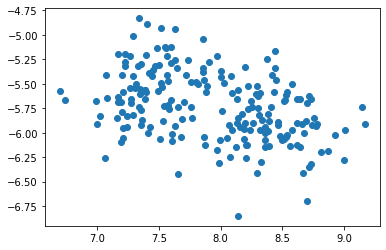

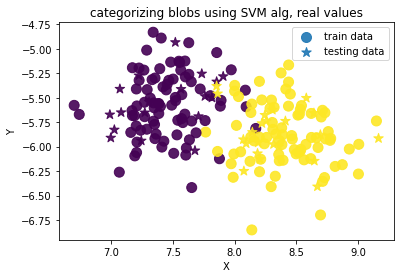

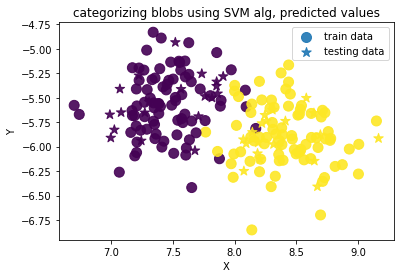

[[20  0]
 [ 2 18]]
TPR = 1.0
FPR = 0.09999999999999998
accuracy = 0.95
precision = 0.9090909090909091


In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, centers=2,
                       cluster_std = 0.30, random_state = 5)
X = X[:, ::-1] # flip axes for better plotting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

fig = plt.subplot()
fig.scatter(X[:,0],X[:,1])
plt.show()
colnames = ["X","Y"]
plotScatter(X_train, X_test, y_train, y_test,"categorizing blobs using SVM alg, real values")
plotScatter(X_train, X_test, y_train, y_pred,"categorizing blobs using SVM alg, predicted values")
TP,TN,FP,FN = results(y_test,y_pred)
print(np.array([[TP,FN],[FP,TN]]))
TPR = TP/(TP+FN)
FPR = 1 - (TN/(TN+FP))
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
res = """TPR = {0}
FPR = {1}
accuracy = {2}
precision = {3}"""
print(res.format(TPR,FPR,accuracy,precision))